In [7]:
import numpy as np
import skfuzzy as fuzz
import pandas as pd
import matplotlib.pyplot as plt
# ------------------------------------------------------------------
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from tabulate import tabulate

In [8]:
#Data
df = pd.read_csv("C:/Users/Hali/Documents/Python/Mall_Customers_preprocessed.csv")
X = df.drop(columns=["customerid"])
data = X.values.T  # FCM yêu cầu dạng (features, samples)

In [9]:
#Optimize
results = []

In [10]:
for c in range(2, 11):
    for m in [1.5, 2.0, 2.5]:   #Các giá trị m thường dùng
        cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
            data, c=c, m=m, error=0.005, maxiter=1000, init=None, seed=42)

        labels = np.argmax(u, axis=0)
        silhouette = silhouette_score(X, labels)
        dbi = davies_bouldin_score(X, labels)
        chi = calinski_harabasz_score(X, labels)

        results.append({
            "Số cụm": c,
            "m": m,
            "Silhouette": round(silhouette, 4),
            "Davies-Bouldin": round(dbi, 4),
            "Calinski-Harabasz": round(chi, 2)
        })

In [11]:
#Bảng kết quả
df_results = pd.DataFrame(results)
print(f"Bảng so sánh, chỉ số Silhouette giảm dần")
print(tabulate(df_results.sort_values("Silhouette", ascending=False).reset_index(drop=True), headers='keys', tablefmt='grid'))

Bảng so sánh, chỉ số Silhouette giảm dần
+----+----------+-----+--------------+------------------+---------------------+
|    |   Số cụm |   m |   Silhouette |   Davies-Bouldin |   Calinski-Harabasz |
+====+==========+=====+==============+==================+=====================+
|  0 |        6 | 1.5 |       0.357  |           1.0096 |               99.45 |
+----+----------+-----+--------------+------------------+---------------------+
|  1 |        5 | 1.5 |       0.3554 |           1.037  |               96.97 |
+----+----------+-----+--------------+------------------+---------------------+
|  2 |        4 | 1.5 |       0.3504 |           1.058  |              101.13 |
+----+----------+-----+--------------+------------------+---------------------+
|  3 |        4 | 2   |       0.3504 |           1.058  |              101.13 |
+----+----------+-----+--------------+------------------+---------------------+
|  4 |        4 | 2.5 |       0.3465 |           1.0664 |              100.18 |

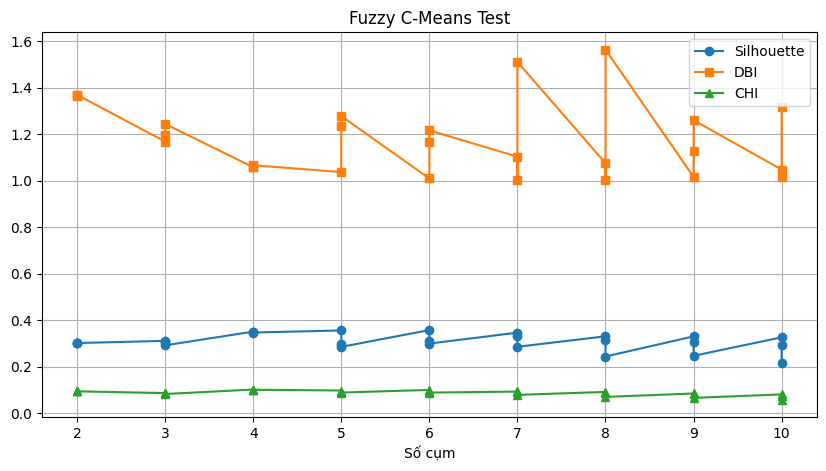

In [12]:
#Vẽ biểu đồ
plt.figure(figsize=(10, 5))
plt.plot(df_results["Số cụm"], df_results["Silhouette"], marker='o', label='Silhouette')
plt.plot(df_results["Số cụm"], df_results["Davies-Bouldin"], marker='s', label='DBI')
plt.plot(df_results["Số cụm"], df_results["Calinski-Harabasz"] / 1000, marker='^', label='CHI')
plt.title("Fuzzy C-Means Test")
plt.xlabel("Số cụm")
plt.legend()
plt.grid(True)
plt.show()